In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdt
import altair as alt
import seaborn as sns
import datetime as dt
from datetime import date
import numpy as np


from nbconvert import HTMLExporter
import codecs
import os
import datetime

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows',100)
%matplotlib inline

In [4]:
%%time
DF_columns = ['DepDate','ArrDate','CrossingDate','Carrier','Flight','Direction','DepPort','ArrPort','DepCountry','ArrCountry','Gender','BD','Nationality','CrossingLoc','Exp_MVMT_FS','Exp_MVMT_Event','UNK_FS']

Months_list = ['../data/TRV_ETL_JAN_2019.csv.gz',
               '../data/TRV_ETL_FEB_2019.csv.gz',
               '../data/TRV_ETL_MAR_2019.csv.gz',
               '../data/TRV_ETL_APR_2019.csv.gz',
               '../data/TRV_ETL_MAY_2019.csv.gz',
               '../data/TRV_ETL_JUN_2019.csv.gz',
               '../data/TRV_ETL_JUL_2019.csv.gz',
               '../data/TRV_ETL_AUG_2019.csv.gz',
               '../data/TRV_ETL_SEP_2019.csv.gz',
               '../data/TRV_ETL_OCT_2019.csv.gz',
               '../data/TRV_ETL_NOV_2019.csv.gz',
               '../data/TRV_ETL_DEC_2019.csv.gz']

dtypes = {'Direction': 'category',
#           'Carrier': 'category',
#           'DepPort': 'category',
#           'ArrPort': 'category',
#           'DepCountry': 'category', 
#           'ArrCountry': 'category',
          'Gender': 'category'}

pax_2019 = pd.concat((pd.read_csv(file_id,names=DF_columns, dtype = dtypes) for file_id in Months_list ),ignore_index=True  )

pax_2019.dropna(subset=['DepDate','ArrDate','BD','CrossingDate'],inplace=True)

pax_2019['DepDate'] = pd.to_datetime(pax_2019['DepDate'])
pax_2019['ArrDate'] = pd.to_datetime(pax_2019['ArrDate'])
pax_2019['BD'] = pd.to_datetime(pax_2019['BD'])

# Drop CrossingTime Column as it will not be needed in that verion on the stats
pax_2019.drop(columns=['CrossingDate'],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 5min 6s


In [5]:
# Convert the categorical columns to category data type to reduce the memory usage 
%%time
pax_2019['Carrier'] = pax_2019['Carrier'].astype('category')
pax_2019['DepPort'] = pax_2019['DepPort'].astype('category')
pax_2019['ArrPort'] = pax_2019['ArrPort'].astype('category')
pax_2019['Nationality'] = pax_2019['Nationality'].astype('category')
pax_2019['CrossingLoc'] = pax_2019['CrossingLoc'].astype('category')
pax_2019['DepCountry'] = pax_2019['DepCountry'].astype('category')
pax_2019['ArrCountry'] = pax_2019['ArrCountry'].astype('category')
pax_2019['Direction'] = pax_2019['Direction'].astype('category')
pax_2019['Gender'] = pax_2019['Gender'].astype('category')

Wall time: 25.6 s


In [17]:
pax_2019.shape

(47030656, 17)

In [325]:
# Convert the movement indicator flags to Category data type to save memory 
pax_2019['UNK_FS'].fillna(value=1,inplace=True)

pax_2019['Exp_MVMT_FS'] = pax_2019['Exp_MVMT_FS'].astype('int8')
pax_2019['Exp_MVMT_Event'] = pax_2019['Exp_MVMT_Event'].astype('int8')
pax_2019['UNK_FS'] = pax_2019['UNK_FS'].astype('int8')

In [34]:
# Check the DF size 
pax_2019.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47030656 entries, 0 to 47282819
Data columns (total 17 columns):
DepDate           datetime64[ns]
ArrDate           datetime64[ns]
CrossingDate      datetime64[ns]
Carrier           category
Flight            object
Direction         category
DepPort           category
ArrPort           category
DepCountry        category
ArrCountry        category
Gender            category
BD                datetime64[ns]
Nationality       category
CrossingLoc       category
Exp_MVMT_FS       int32
Exp_MVMT_Event    int32
UNK_FS            int32
dtypes: category(9), datetime64[ns](4), int32(3), object(1)
memory usage: 5.5 GB


In [7]:
""" To calculate the age based on the Birth Date """

def calculate_age(born):
    today = date.today()
    try: 
        birthday = born.replace(year=today.year)
    except ValueError: # raised when birth date is February 29 and the current year is not a leap year
        birthday = born.replace(year=today.year, month=born.month+1, day=1)
    if birthday > today:
        return today.year - born.year - 1
    else:
        return today.year - born.year

In [8]:
# Add a new column for Age based on Birth Date
%%time
pax_2019['Age'] = pax_2019['BD'].apply(calculate_age).astype('int8')

Wall time: 5min 46s


In [319]:
# Delete the data before and after 2019
pax_2019 = pax_2019[pax_2019['DepDate'] <= '2020-01-01']
pax_2019 = pax_2019[pax_2019['DepDate'] >= '2018-12-31']

pax_2019.drop(columns=['BD'],inplace=True)

pax_2019['DepDay'] = pax_2019['DepDate'].dt.date.astype('category')

In [ ]:
%%time
pax_2019.to_pickle('./pax_trv.pkl',compression={'gzip'})

In [357]:
trv_per_day['DepDay'] = trv_per_day['DepDay'].astype(str)

trv_per_day['DepDay'] = pd.to_datetime(trv_per_day['DepDay'])

In [412]:
trv_per_day.rename({'Nationality':'Count'},axis=1,inplace=True)

In [413]:
trv_per_day

,DepDay,Direction,Gender,Count
0,2018-12-30,I,M,1
1,2018-12-31,I,F,4620
2,2018-12-31,I,M,6614
3,2018-12-31,I,U,9
4,2018-12-31,O,F,113
...,...,...,...,...
2191,2019-12-31,I,M,30828
2192,2019-12-31,I,U,55
2193,2019-12-31,O,F,39453
2194,2019-12-31,O,M,51198


In [414]:
alt.Chart(trv_per_day).mark_circle().encode(
x='DepDay',
    y='Count',
    color='Direction',
    size=alt.Size('Count:Q',
         scale=alt.Scale(range=[1, 250]),
         legend=alt.Legend(title='Trav Count'))
).properties(
width=800,
    height=450
)



alt.Chart(...)

In [13]:
pax_2019.Carrier.cat.codes.head(10)
pax_2019.Carrier.cat.categories

Index(['2G', '2J', '3J', '3T', '4J', '4Q', '5A', '5E', '6B', '6D',
       ...
       'XT', 'XX', 'XXX', 'XY', 'Y8', 'YL', 'YX', 'Z1', 'Z4', 'ZQ'],
      dtype='object', length=216)

In [322]:
pd.set_option('display.max_rows',30)
xx.tail(100)

# 2016-11-05         1
# 2018-08-09         1
# 2018-10-11         1
# 2018-11-21         1
# 2018-12-25         1
# 2018-12-29         1
# 2018-12-30         1

DepDay
2019-09-23     92988
2019-09-24     87317
2019-09-25     88865
2019-09-26     98170
2019-09-27     87792
               ...  
2019-12-27    132151
2019-12-28    152505
2019-12-29    142373
2019-12-30    144524
2019-12-31    139822
Name: Nationality, Length: 100, dtype: int64

In [317]:
pax_2019[pax_2019['DepDate'] == '2020-05-31']

,DepDate,ArrDate,Carrier,Flight,Direction,DepPort,ArrPort,DepCountry,ArrCountry,Gender,Nationality,CrossingLoc,Exp_MVMT_FS,Exp_MVMT_Event,UNK_FS,Age,AgeGroup,DepDay


In [16]:
pax_2019[pax_2019.Age > 120].groupby('Age')['Age'].count()

Age
121    3
122    2
123    2
132    1
134    3
135    4
242    1
Name: Age, dtype: int64

In [566]:
pax_2019

,DepDate,ArrDate,Carrier,Flight,Direction,DepPort,ArrPort,DepCountry,ArrCountry,Gender,Nationality,CrossingLoc,Exp_MVMT_FS,Exp_MVMT_Event,UNK_FS,Age,AgeGroup,DepDay
0,2019-01-05 07:00:00,2019-01-05 12:50:00,PK,0754,O,RUH,ISB,SAU,PAK,M,PAK,RUH,1,1,0,37,25 to 40,2019-01-05
1,2019-01-14 06:25:00,2019-01-14 12:20:00,SV,0037,O,RUH,IAD,SAU,USA,M,SAU,RUH,1,1,0,33,25 to 40,2019-01-14
2,2019-01-14 06:25:00,2019-01-14 12:20:00,SV,0037,O,RUH,IAD,SAU,USA,F,SAU,RUH,1,1,0,10,02 to 12,2019-01-14
3,2019-01-14 06:25:00,2019-01-14 12:20:00,SV,0037,O,RUH,IAD,SAU,USA,F,SAU,RUH,1,1,0,68,60 to 70,2019-01-14
4,2019-01-14 06:25:00,2019-01-14 12:20:00,SV,0037,O,RUH,IAD,SAU,USA,M,SAU,RUH,1,1,0,1,00 to 02,2019-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47282815,2019-12-30 03:45:00,2019-12-30 07:10:00,ET,0413,O,RUH,ADD,SAU,ETH,F,ERI,RUH,1,0,0,75,70+,2019-12-30
47282816,2019-12-29 16:25:00,2019-12-29 16:45:00,E5,0590,O,TUU,CAI,SAU,EGY,M,CHN,TUU,1,1,0,36,25 to 40,2019-12-29
47282817,2019-12-30 02:10:00,2019-12-30 02:40:00,EY,0323,I,AUH,DMM,ARE,SAU,M,IND,DMM,1,1,0,49,40 to 50,2019-12-30
47282818,2019-12-30 05:30:00,2019-12-30 11:00:00,SV,0041,O,JED,LAX,SAU,USA,M,USA,JED,1,1,0,13,12 to 18,2019-12-30


In [19]:
pax_2019.loc[pax_2019.Age > 120,  ['DepDate','Carrier','Flight','Nationality','Gender','BD','Age']]

,DepDate,Carrier,Flight,Nationality,Gender,BD,Age
9237287,2019-03-01 15:35:00,SV,0564,SAU,F,1899-04-30,121
9560937,2019-03-06 14:00:00,SV,0565,SAU,F,1899-05-01,121
13027476,2019-04-28 13:25:00,J9,0222,SAU,F,1899-06-02,121
16678932,2019-05-30 10:55:00,FZ,5351,ARE,M,1897-01-01,123
20243493,2019-06-11 00:00:59,XX,0001,PAK,M,1884-12-25,135
20624565,2019-06-02 23:50:00,FZ,0878,ARE,M,1897-01-01,123
20817192,2019-06-29 00:00:54,XX,0001,PAK,M,1884-12-25,135
20819329,2019-06-28 06:00:06,PRV,PAF101,PAK,M,1884-12-25,135
20966935,2019-06-10 10:00:04,XX,0004,PAK,M,1884-12-25,135
21102596,2019-06-29 15:55:00,SV,0500,KWT,M,1898-01-26,122


In [250]:
def age_group(age):
    if (0 < age <= 2):
        return '00 to 02'
    elif (2 < age <= 12): 
        return '02 to 12'
    elif (12 < age <= 18): 
        return '12 to 18'
    elif (18 < age <= 25):
        return '18 to 25'
    elif (25 < age <= 40):
        return '25 to 40'
    elif (40 < age <= 50):
        return '40 to 50'
    elif (50 < age <= 60):
        return '50 to 60'
    elif (60 < age <= 70):
        return '60 to 70'
    else :
        return '70+'
    
     
        

In [251]:
%%time
pax_2019['AgeGroup'] = pax_2019['Age'].apply(age_group).astype('category')

Wall time: 19.5 s


,DepDate,ArrDate,Carrier,Flight,Direction,DepPort,ArrPort,DepCountry,ArrCountry,Gender,Nationality,CrossingLoc,Exp_MVMT_FS,Exp_MVMT_Event,UNK_FS,Age,AgeGroup
0,2019-01-05 07:00:00,2019-01-05 12:50:00,PK,0754,O,RUH,ISB,SAU,PAK,M,PAK,RUH,1,1,0,37,25 to 40
1,2019-01-14 06:25:00,2019-01-14 12:20:00,SV,0037,O,RUH,IAD,SAU,USA,M,SAU,RUH,1,1,0,33,25 to 40
2,2019-01-14 06:25:00,2019-01-14 12:20:00,SV,0037,O,RUH,IAD,SAU,USA,F,SAU,RUH,1,1,0,10,02 to 12
3,2019-01-14 06:25:00,2019-01-14 12:20:00,SV,0037,O,RUH,IAD,SAU,USA,F,SAU,RUH,1,1,0,68,60 to 70
4,2019-01-14 06:25:00,2019-01-14 12:20:00,SV,0037,O,RUH,IAD,SAU,USA,M,SAU,RUH,1,1,0,1,00 to 02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47282815,2019-12-30 03:45:00,2019-12-30 07:10:00,ET,0413,O,RUH,ADD,SAU,ETH,F,ERI,RUH,1,0,0,75,70+
47282816,2019-12-29 16:25:00,2019-12-29 16:45:00,E5,0590,O,TUU,CAI,SAU,EGY,M,CHN,TUU,1,1,0,36,25 to 40
47282817,2019-12-30 02:10:00,2019-12-30 02:40:00,EY,0323,I,AUH,DMM,ARE,SAU,M,IND,DMM,1,1,0,49,40 to 50
47282818,2019-12-30 05:30:00,2019-12-30 11:00:00,SV,0041,O,JED,LAX,SAU,USA,M,USA,JED,1,1,0,13,12 to 18


In [ ]:
pax_2019.to_pickle('../data/pax_2019.pkl',compression='gzip')

In [238]:
AgesByGender = pax_2019.groupby(['AgeGroup','Gender'])['Gender'].count()

In [239]:
AgesByGender = AgesByGender.to_frame()
AgesByGender.index = AgesByGender.index.set_names(['AgeRange','gender'])
AgesByGender.reset_index(inplace=True)
AgesByGender.rename({'Gender':'Count'},axis=1,inplace=True)

In [240]:
alt.Chart(AgesByGender).mark_bar().encode(
y = 'Count',
x = 'AgeRange',
color = 'gender',
tooltip=['gender','Count']).properties(
            width = 750,height=360)

alt.Chart(...)

In [207]:
# import plotly.graph_objects as go
# fig2 = go.Figure()

# fig2.add_trace( go.Bar(x=AgesByGender['AgeRange'],y=AgesByGender['Count'],hoverinfo='all'))
# # fig2.add_trace( go.Bar(x=AgesByGender['AgeRange'],y=AgesByGender['Count'],mode="markers+lines", ))

# fig2.show()

In [209]:
# fig = px.line(AgesByGender, x="AgeRange", y="Count", color="gender", title="layout.hovermode='closest' (the default)")
# fig.update_traces(mode="markers+lines")

# # 
# fig.show()

In [244]:
AgesByGender2 = pax_2019.groupby(['AgeGroup','Gender'])['Gender'].count()

In [245]:
xx = AgesByGender2.unstack()

In [235]:
alt.Chart(AgesByGender).mark_circle().encode(
    x='AgeRange:O',
    y='Count',
    color='gender',
    tooltip = ['AgeRange', 'gender','gender'],
    size=alt.Size('Count:Q',
        scale=alt.Scale(range=[100, 2000]),
        legend=alt.Legend(title='Daily new cases')
    ) 
).properties(
    width=800,
    height=300
).interactive()

alt.Chart(...)

In [460]:
trv_per_day = pax_2019.groupby(['DepDay','Direction','Nationality'])['Gender'].count()
trv_per_day = trv_per_day.reset_index()

trav_by_nat_Direction  = trv_per_day.groupby(['Nationality','Direction']).sum().reset_index().rename({'Gender':'Total'},axis=1) 

,Nationality,Direction,Total
0,009,I,NaN
1,009,O,1.0
2,012,I,1.0
3,012,O,1.0
4,016,I,1.0
...,...,...,...
499,ZAF,O,57538.0
500,ZMB,I,1063.0
501,ZMB,O,1035.0
502,ZWE,I,1181.0


In [472]:
trav_by_nat_Direction['Total'].fillna(value=0,inplace=True)

In [474]:
trav_by_nat_Direction['Total'] = trav_by_nat_Direction['Total'].astype('int32')

In [477]:
# Top 10  Nationalities by Direction

Top_10_I_Nats = trav_by_nat_Direction[trav_by_nat_Direction['Direction'] == 'I'].sort_values('Total',ascending=False).head(10)

Top_10_O_Nats = trav_by_nat_Direction[trav_by_nat_Direction['Direction'] == 'O'].sort_values('Total',ascending=False).head(10)

In [478]:
Top_10_O_Nats

,Nationality,Direction,Total
383,SAU,O,4296244
217,IND,O,3025770
345,PAK,O,3015564
149,EGY,O,2484322
215,IDN,O,1483875
75,BGD,O,908988
353,PHL,O,685366
387,SDN,O,564206
447,TUR,O,554745
145,DZA,O,436080


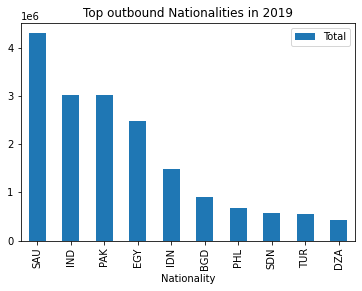

In [483]:
Top_10_O_Nats.plot(x='Nationality',y='Total',kind='bar', title='Top outbound Nationalities in 2019')

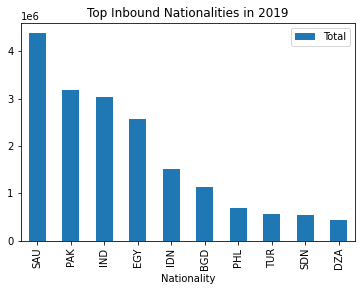

In [482]:
Top_10_I_Nats.plot(x='Nationality',y='Total',kind='bar', title='Top Inbound Nationalities in 2019')

In [485]:
Top_10_Nats = trav_by_nat_Direction.sort_values('Total',ascending=False).head(20)

Top_10_Nats

,Nationality,Direction,Total
382,SAU,I,4378575
383,SAU,O,4296244
344,PAK,I,3181434
217,IND,O,3025770
216,IND,I,3025374
345,PAK,O,3015564
148,EGY,I,2570563
149,EGY,O,2484322
214,IDN,I,1508156
215,IDN,O,1483875


In [561]:
alt.Chart(Top_10_Nats).mark_bar().encode(
    x=alt.X('Direction:O',axis=alt.Axis(title=None, labels=False, ticks=False)) ,
    y=alt.Y('Total:Q',axis = alt.Axis(grid=False)) ,
    color='Direction:N',
     column=alt.Column('Nationality:N', header=alt.Header(title=None, labelOrient='bottom')),
    tooltip=['Nationality','Direction','Total']).configure_view(
    stroke='transparent', 
).properties(height=250, width=60).configure_header(labelOrient='bottom',
                   labelPadding = 3).configure_facet(spacing=5
)

alt.Chart(...)

In [570]:
alt.Chart(Top_10_I_Nats).mark_bar().encode(
    x=alt.X('Direction:O',axis=alt.Axis(title=None, labels=False, ticks=False)) ,
    y=alt.Y('Total:Q',axis = alt.Axis(grid=False)) ,
#     color='Direction:N',
     column=alt.Column('Nationality:N', header=alt.Header(title=None, labelOrient='bottom')),
    tooltip=['Nationality','Direction','Total'],
     order=alt.Order('Nationality',sort='ascending')
).configure_view(
    stroke='transparent', 
).properties(height=250, width=60).configure_header(labelOrient='bottom',
                   labelPadding = 3).configure_facet(spacing=5
)

alt.Chart(...)

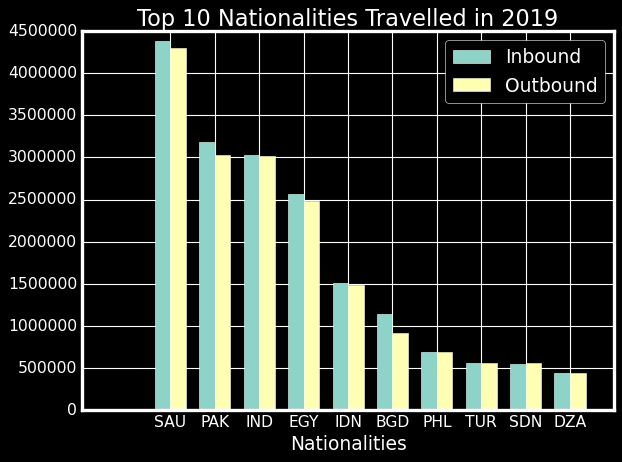

In [625]:
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')
# plt.style.use('seaborn-bright')
# plt.style.use('classic')
# plt.style.use('bmh')

width = 0.35 
fig , ax = plt.subplots()

ax.set_title('Top 10 Nationalities Travelled in 2019')

x = np.arange(len(Top_10_I_Nats['Nationality'])) 
inbound = ax.bar(x - width/2 ,Top_10_I_Nats['Total'],width,label='Inbound')
plt.xlabel('Nationalities')


# plt.yticks(ticks=range(100000,5000000,100000))
outbound = ax.bar(x + width/2 ,Top_10_O_Nats['Total'],width,label='Outbound')

ax.set_xticks(x)
ax.set_xticklabels(Top_10_I_Nats['Nationality'].values,)

ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 6),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# autolabel(inbound)
# autolabel(outbound)

fig.tight_layout()

In [602]:
trv_per_day = pax_2019.groupby(['DepDay','AgeRange','Nationality'])['Gender'].count()
trv_per_day = trv_per_day.reset_index()

trav_by_nat_Direction  = trv_per_day.groupby(['Nationality','Direction']).sum().reset_index().rename({'Gender':'Total'},axis=1) 

AttributeError: 'Rectangle' object has no attribute 'get_hight'